In [ ]:
import pip
pip.main(['install','tensorflow==1.14.0'])
import tensorflow as tf

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
print(tf)

<module 'tensorflow' from '/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py'>


In [ ]:
import pandas as pd
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [ ]:
import matplotlib.pyplot as plt
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


          From Date           To Date  PM2.5   PM10    NO2   SO2    CO  Ozone
0  10-09-2021 00:00  11-09-2021 00:00  14.84  37.75   8.75  7.79  0.47  20.87
1  11-09-2021 00:00  12-09-2021 00:00  16.59  34.75   8.91  7.97  0.58  21.03
2  12-09-2021 00:00  13-09-2021 00:00  12.27  31.07   8.01  7.77  0.56  21.08
3  13-09-2021 00:00  14-09-2021 00:00  12.86  33.42   9.03  7.90  0.47  20.66
4  14-09-2021 00:00  15-09-2021 00:00  16.24  42.26   9.70  7.98  0.41  21.17
5  15-09-2021 00:00  16-09-2021 00:00  16.69  48.24  12.86  7.03  0.32  21.43
6  16-09-2021 00:00  17-09-2021 00:00  19.98  60.60  12.01  7.70  0.47  20.99
7  17-09-2021 00:00  18-09-2021 00:00  24.82  69.24  16.03  6.96  0.47  21.23
8  18-09-2021 00:00  19-09-2021 00:00  20.31  66.68  15.93  6.97  0.45  22.27
9  19-09-2021 00:00  20-09-2021 00:00  22.03  65.59  12.90  7.06  0.39  24.34
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cas

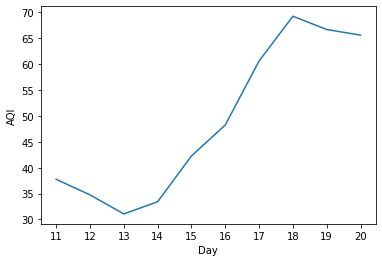

In [ ]:
import pip
pip.main(['install','openpyxl','xlrd'])
df=pd.read_excel("site_155420210920175736.xlsx",skiprows=16,
                 na_values=['None'],engine='openpyxl',)
df1=df.iloc[0:10,0:7]
df1['Ozone']=list(df.iloc[16:26,2])
df1.fillna(value=0,inplace=True)
print(df1)
#The lines 2,3,4 are used to obtain a proper dataframe from the file mentioned above
#The dataframe has 8 columns: 6 pollutants + from date and to date

def function(ihi,bhi,ilo,blo,cp):
    ip=(((ihi-ilo)/(bhi-blo))*(cp-blo))+ilo
    return ip

def quality(n,df11):
 collist = (list(df11.columns))[2:]
 ihi = 0;ilo = 0;blo = 0;bhi = 0
 aqi = 0
 for i in collist:
    cp=df11[i][n]
    if(i=="PM10"):
        if(cp>=0 and cp<51):
            blo=0;bhi=50;ilo=0;ihi=50
        elif (cp >= 51 and cp < 101):
            blo=51;bhi=100;ilo=51;ihi=100
        elif (cp >= 101 and cp < 251):
            blo=101;bhi=250;ilo=101;ihi=200
        elif (cp >= 251 and cp < 351):
            blo=251;bhi=350;ilo=201;ihi=300
        elif (cp >= 351 and cp <= 430):
            blo=351;bhi=430;ilo=301;ihi=400
        elif (cp >430):
            blo=430;bhi=530;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 530 in the last case as
        # no upper limit was specified
    elif (i == "PM2.5"):
        if (cp >= 0 and cp < 31):
            blo=0;bhi=30;ilo=0;ihi=50
        elif (cp >= 31 and cp < 61):
            blo=31;bhi=60;ilo=51;ihi=100
        elif (cp >= 61 and cp < 91):
            blo=61;bhi=90;ilo=101;ihi=200
        elif (cp >= 91 and cp < 121):
            blo=91;bhi=120;ilo=201;ihi=300
        elif (cp >= 121 and cp <= 250):
            blo=121;bhi=250;ilo=301;ihi=400
        elif (cp > 250):
            blo=250;bhi=380;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 380 in the last case as
        # no upper limit was specified
    elif (i == "NO2"):
        if (cp >= 0 and cp < 41):
            blo=0;bhi=40;ilo=0;ihi=50
        elif (cp >= 41 and cp < 81):
            blo=41;bhi=80;ilo=51;ihi=100
        elif (cp >= 81 and cp < 181):
            blo=81;bhi=180;ilo=101;ihi=200
        elif (cp >= 181 and cp < 281):
            blo=181;bhi=280;ilo=201;ihi=300
        elif (cp >= 281 and cp <= 400):
            blo=281;bhi=400;ilo=301;ihi=400
        elif (cp > 400):
            blo=400;bhi=520;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 520 in the last case as
        # no upper limit was specified
    elif (i == "Ozone"):
        if (cp >= 0 and cp < 51):
            blo=0;bhi=50;ilo=0;ihi=50
        elif (cp >= 51 and cp < 101):
            blo=51;bhi=100;ilo=51;ihi=100
        elif (cp >= 101 and cp < 169):
            blo=101;bhi=168;ilo=101;ihi=200
        elif (cp >= 169 and cp < 209):
            blo=169;bhi=208;ilo=201;ihi=300
        elif (cp >= 209 and cp <= 748):
            blo=209;bhi=748;ilo=301;ihi=400
        elif (cp > 748):
            blo=748;bhi=1000;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 1000 in the last case as
        # no upper limit was specified
    elif (i == "CO"):
        if (cp >= 0 and cp < 1.1):
            blo=0;bhi=1;ilo=0;ihi=50
        elif (cp >= 1.1 and cp < 2.1):
            blo=1.1;bhi=2;ilo=51;ihi=100
        elif (cp >= 2.1 and cp < 10.1):
            blo=2.1;bhi=10;ilo=101;ihi=200
        elif (cp >= 10.1 and cp < 17.1):
            blo=10.1;bhi=17;ilo=201;ihi=300
        elif (cp >= 17.1 and cp <= 34):
            blo=17.1;bhi=34;ilo=301;ihi=400
        elif (cp > 34):
            blo=34;bhi=70;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 70 in the last case as
        # no upper limit was specified
    elif (i == "SO2"):
        if (cp >= 0 and cp < 41):
            blo=0;bhi=40;ilo=0;ihi=50
        elif (cp >= 41 and cp < 81):
            blo=41;bhi=80;ilo=51;ihi=100
        elif (cp >= 81 and cp < 381):
            blo=81;bhi=380;ilo=101;ihi=200
        elif (cp >= 381 and cp < 801):
            blo=381;bhi=800;ilo=201;ihi=300
        elif (cp >= 801 and cp <= 1600):
            blo=801;bhi=1600;ilo=301;ihi=400
        elif (cp > 1600):
            blo=1600;bhi=3200;ilo=401;ihi=500
        # Arbitrarily choosing bhi as 3200 in the last case as
        # no upper limit was specified

    index=function(ihi,bhi,ilo,blo,cp)
    if(index>aqi):
        aqi=index
 return aqi

#Finding AQI for all rows
l1=[]
for i in range(10):
    l1.append(quality(i,df1))

#Displaying the pattern of variation of AQI across days
array1=[11,12,13,14,15,16,17,18,19,20]
plt.plot(df1['To Date'],l1)
plt.xticks(df1['To Date'],array1)
plt.xlabel("Day")
plt.ylabel("AQI")
plt.show()


In [ ]:
idf=pd.read_excel("site_155420210930165501.xlsx",skiprows=16,na_values=['None'],engine='openpyxl',)
tdf=idf.iloc[0:4,0:7]
tdf['Ozone']=list(idf.iloc[9:,2])
tdf.fillna(value=0,inplace=True)
print(tdf)
l3=[]
for i in range(3):
    l3.append(quality(i,tdf))
print(l3)

          From Date           To Date  PM2.5   PM10    NO2   SO2    CO  Ozone
0  20-09-2021 00:00  21-09-2021 00:00  20.69  57.23  28.51  7.09  0.62  21.22
1  21-09-2021 00:00  22-09-2021 00:00  13.65  32.98  14.74  6.80  0.44  20.82
2  22-09-2021 00:00  23-09-2021 00:00  12.79  28.22  12.54  7.37  0.42  20.71
3  23-09-2021 00:00  23-09-2021 00:00  10.00  17.00  10.85  7.40  0.42  20.09
[57.23, 32.98, 28.22]


In [ ]:
df1['aqi']=l1
df1['pressure']=[1012,1011,1010,1012,1013,1013,1012,1014,1014,1012]
df1['temperature']=[28,28,28,29,29,30,31,31,30,29]
df1

,From Date,To Date,PM2.5,PM10,NO2,SO2,CO,Ozone,aqi,pressure,temperature
0,10-09-2021 00:00,11-09-2021 00:00,14.84,37.75,8.75,7.79,0.47,20.87,37.75,1012,28
1,11-09-2021 00:00,12-09-2021 00:00,16.59,34.75,8.91,7.97,0.58,21.03,34.75,1011,28
2,12-09-2021 00:00,13-09-2021 00:00,12.27,31.07,8.01,7.77,0.56,21.08,31.07,1010,28
3,13-09-2021 00:00,14-09-2021 00:00,12.86,33.42,9.03,7.90,0.47,20.66,33.42,1012,29
4,14-09-2021 00:00,15-09-2021 00:00,16.24,42.26,9.70,7.98,0.41,21.17,42.26,1013,29
5,15-09-2021 00:00,16-09-2021 00:00,16.69,48.24,12.86,7.03,0.32,21.43,48.24,1013,30
6,16-09-2021 00:00,17-09-2021 00:00,19.98,60.60,12.01,7.70,0.47,20.99,60.60,1012,31
7,17-09-2021 00:00,18-09-2021 00:00,24.82,69.24,16.03,6.96,0.47,21.23,69.24,1014,31
8,18-09-2021 00:00,19-09-2021 00:00,20.31,66.68,15.93,6.97,0.45,22.27,66.68,1014,30
9,19-09-2021 00:00,20-09-2021 00:00,22.03,65.59,12.90,7.06,0.39,24.34,65.59,1012,29


In [ ]:
df1.corr()

,PM2.5,PM10,NO2,SO2,CO,Ozone,aqi,pressure,temperature
PM2.5,1.000000,0.942320,0.866590,-0.717789,-0.280463,0.518012,0.942320,0.638732,0.709425
PM10,0.942320,1.000000,0.931613,-0.806849,-0.419341,0.580402,1.000000,0.693721,0.784104
NO2,0.866590,0.931613,1.000000,-0.897403,-0.444457,0.443054,0.931613,0.813522,0.802621
SO2,-0.717789,-0.806849,-0.897403,1.000000,0.540622,-0.594625,-0.806849,-0.632145,-0.590090
CO,-0.280463,-0.419341,-0.444457,0.540622,1.000000,-0.405808,-0.419341,-0.592730,-0.425300
Ozone,0.518012,0.580402,0.443054,-0.594625,-0.405808,1.000000,0.580402,0.154481,0.056411
aqi,0.942320,1.000000,0.931613,-0.806849,-0.419341,0.580402,1.000000,0.693721,0.784104
pressure,0.638732,0.693721,0.813522,-0.632145,-0.592730,0.154481,0.693721,1.000000,0.696689
temperature,0.709425,0.784104,0.802621,-0.590090,-0.425300,0.056411,0.784104,0.696689,1.000000


[[28, 28, 28, 29, 29, 30, 31, 31, 30, 29], [1012, 1011, 1010, 1012, 1013, 1013, 1012, 1014, 1014, 1012]]
Epoch 1/250
10/10 [==============================] - 0s 7ms/sample - loss: 1643.9479 - root_mean_squared_error: 40.5456
Epoch 2/250
10/10 [==============================] - 0s 217us/sample - loss: 1571.2428 - root_mean_squared_error: 39.6389
Epoch 3/250
10/10 [==============================] - 0s 224us/sample - loss: 1520.2644 - root_mean_squared_error: 38.9906
Epoch 4/250
10/10 [==============================] - 0s 204us/sample - loss: 1478.6139 - root_mean_squared_error: 38.4527
Epoch 5/250
10/10 [==============================] - 0s 166us/sample - loss: 1442.3918 - root_mean_squared_error: 37.9788
Epoch 6/250
10/10 [==============================] - 0s 393us/sample - loss: 1409.7975 - root_mean_squared_error: 37.5473
Epoch 7/250
10/10 [==============================] - 0s 178us/sample - loss: 1379.8314 - root_mean_squared_error: 37.1461
Epoch 8/250
10/10 [========================

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


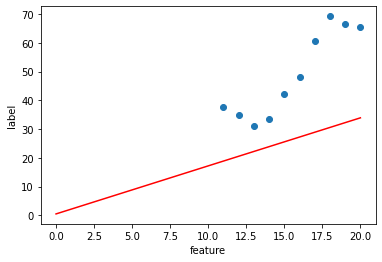

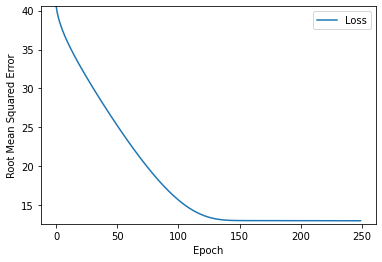

In [ ]:
learning_rate=0.01
epochs=250
my_batch_size=12
print([list(df1['temperature']), list(df1['pressure'])])
my_model = build_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, df1['temperature'],
                                                         l1, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, array1, l1)
plot_the_loss_curve(epochs, rmse)

In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

 
  predicted_values = my_model.predict_on_batch(x=feature)

  for i in range(n):
    print (predicted_values[i][0] )

In [ ]:
arr1=[[29,29,28],[1013,1010,1011]]
print("Calculted aqi values",l3)
print("Predicted aqi values")
predict_house_values(3, arr1, l3)

Calculted aqi values [57.23, 32.98, 28.22]
Predicted aqi values
48.94444
48.94444
47.27311
